#  Ques 1) Now your friend has followed a lot of different food bloggers, he needs to analyse the habits of these bloggers.

    1) From the list of instagram handles you obtained when you searched ‘food’ in previous project. Open the first 10 handles and find the top 5 which have the highest number of followers                                                          
    2)Now Find the number of posts these handles have done in the previous 3 days.                                                  
    3)Depict this information using a suitable graph.


# 1.1)  Code for top 5 handles having highest no of followers from top 10 handles on   searching the food

In [9]:
# code for ques 1 1)
from selenium import webdriver #The selenium.webdriver module provides all the WebDriver implementationsm,This allow us to control browser with our code
from selenium.webdriver.support.ui import WebDriverWait# files for providing waits
from selenium.webdriver.support import expected_conditions as EC# to provide the explicit wait (conditon)
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains#ActionChains are a way to automate low level interactions such as mouse movements, mouse button actions, key press
from selenium.webdriver.common.keys import Keys# This Keys class provide keys in the keyboard
import time# Importing the time 
from selenium.common.exceptions import NoSuchElementException# import nosuchelementexception module
#function for login
def handlenames(driver):
    
    # go to instagram login page using .get request
    driver.get('https://www.instagram.com/')
    # wait for some time for loading page
    time.sleep(2)
    # passing the username in the the text-box for username(This text-box has name->username so I'm using this to locate the text-box)
    username=driver.find_element_by_name('username').send_keys('sample_username')# pass the user handle name or email or mobile no(for that i used .send_keys)
    # passing the password in the the text-box for password(This text-box has name->password so I'm using this to locate the text-box)
    password=driver.find_element_by_name('password').send_keys('sample_password')# pass the password(for that i used .send_keys)
    # now need to click on login button to login and this is of type submit so used .submit to click over it
    Login_button=driver.find_element_by_class_name('sqdOP.L3NKy.y3zKF').submit()#class name for login button was  "sqdOP.L3NKy.y3zKF" so i used that
    # wait for some time to completely load the page here i used implicit wait I have given Implicit Wait as 5 seconds, #
    #which implies the maximum wait time is 5 seconds for the particular element to load or to arrive at the output
    # means agr phle output aagya tho wait nhi krega yeh
    
    driver.implicitly_wait(5)
    # as You login their comes a pop up saying whether you want to save the details or not Here we are 
    # handling this by clicking on not now button
    try:# if this pop up comes click on not now
        save_login_info=driver.find_element_by_xpath('//div[@class="cmbtv"]/button').click()
    except NoSuchElementException:# if no such pop-up open then pass (I'm doing this because some time this pop up doesnt came)
        pass
    # wait for some time to load the page 
    driver.implicitly_wait(10)
    # ek notification aa rhi hai as you login :-"Turn on Notifications Know right away when people follow you or like and comment on your photos."
    # thi Extra_notification_handle is to handle that extra notification
    Extra_notification_handle=driver.find_element_by_class_name('aOOlW.HoLwm ')#aOOlW   HoLwm is the class name for cancle button of notification 
    Extra_notification_handle.click()# bacuse the cancle button is not of submit type so I had to click
    time.sleep(2)# wait for 2 sec
    # pass the word "food" in the search box to print the insatgrams handle
    # to locate the search box using the class name of the search box having the class name "XTCLo.x3qfX"
    search_bar=driver.find_element_by_class_name('XTCLo.x3qfX')
    # passing the word "food" in the search box usnig the .send_keys fun
    search_bar.send_keys('food')
    # wait for some time so that all the handles can be loaded
    time.sleep(2)
    # to get the names of driver 
    # locate the names of insta handle having the class name "Ap253"
    names=driver.find_elements_by_class_name('Ap253')
    # not printing the hastags 
    list_of_foodblogger=[]
    for i in names:
        if '#' not in i.text:
            list_of_foodblogger.append(i.text)
    return list_of_foodblogger

def no_of_followers(instahandle):
    # send get request to the foodbloggers:
    wait = WebDriverWait(driver,10)
    foodbloggerurl='https://www.instagram.com/'+ instahandle
    driver.get(foodbloggerurl)
    # get the no of followers:
    follower=driver.find_element_by_xpath('//ul[@class="k9GMp "]/li[2]/a')
    no_of_followers_Count=follower.find_element_by_class_name("g47SY ").get_attribute('title')
    return no_of_followers_Count


# using geckodriver(FireFox web driver name) to remote the window please use the path for geckodriver as per your system
# here geckodriver is within anaconda so I write it straight forward
driver=webdriver.Firefox(executable_path='geckodriver')
# calling login function
a=handlenames(driver)
Count=[]
for i in range(10):
    Count.append(no_of_followers(a[i]))
Followerss=[]
for i in Count:
    Followerss.append(int(i.replace(',', '')))
import pandas as pd
df=pd.DataFrame(list(zip(a[0:10],Followerss)),columns=["Name","Followers"])
df=df.sort_values(by=["Followers"],ascending=False)
final_df=df[0:5].reset_index(drop=True)
print("Top five handles with insta followers:")
[print(*row, sep='    ') for row in final_df.values.tolist()];


# ****making the list of top 5 handles and their followers to use in next part of the problem***
top_5_handles=[]
top_5_handles_followers=[]
for i in final_df['Name']:
    top_5_handles.append(i)
for i in final_df['Followers']:
    top_5_handles_followers.append(i)

Top five handles with insta followers:
foodnetwork    10302269
foodgod    3634553
foodandwine    3432755
dilsefoodie    445950
foodtalkindia    295381


# Printing the top_5_handles obtain and their followers which is going to used in further problems

In [10]:
# list of top 5 instahandles
# to be used in the next part of the problem
print(top_5_handles)
print(top_5_handles_followers)

['foodnetwork', 'foodgod', 'foodandwine', 'dilsefoodie', 'foodtalkindia']
[10302269, 3634553, 3432755, 445950, 295381]


# 1.2) Code for no of post done by these handles in previous 3 days

In [12]:
# code  for:- 2)Now Find the number of posts these handles have done in the previous 3 days.   

from selenium import webdriver #The selenium.webdriver module provides all the WebDriver implementationsm,This allow us to control browser with our code
from selenium.webdriver.support.ui import WebDriverWait# files for providing waits
from selenium.webdriver.support import expected_conditions as EC# to provide the explicit wait (conditon)
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains#ActionChains are a way to automate low level interactions such as mouse movements, mouse button actions, key press
from selenium.webdriver.common.keys import Keys# This Keys class provide keys in the keyboard
import time# Importing the time 
from selenium.common.exceptions import NoSuchElementException# import nosuchelementexception module
from datetime import datetime

def Count_post(handle_name):
    # send get request to the instagram handle of the dilsefoodie using the handlename 
    wait = WebDriverWait(driver,10)
    i='https://www.instagram.com/'+ handle_name
    driver.get(i)
    # wait for some time to load the page
    time.sleep(3)
    # innitilize actionChain to automate low level interactions such as mouse movements, mouse button actions, key press,
    actionChain=webdriver.ActionChains(driver)#action chain object
    # scroll the page using the actionChain for uploading the posts 
    for i in range(200):
        actionChain.key_down(Keys.SPACE).key_up(Keys.SPACE).perform()# scrollung the page of dilsefoodie
    # send the control to the top of the page
    driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + Keys.HOME)
    #made a list to store the href of every post the href are in a tag of div having class = "v1Nh3 kIKUG  _bz0w"
    time.sleep(3)
    href = []
    for i in driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a'):
        # appending the url of post in the list href
        href.append(i.get_attribute('href'))
        
    # initate the count with 0
    count=0
    
    for i in href:
        
        #itrate over the list one by one and take the info of liked or not of the post
        driver.get(i)
        # locate the date information usnig the div class EtaWk
        date_info_ = driver.find_element_by_css_selector('div.EtaWk div a')
        date_info=driver.find_element_by_css_selector('time').text
        # if the date info has week in it then break (because we need post of previous 3 days only)
        if 'w' in date_info:# w is for week You need not to handle the year as before the year their will be weeks and you have breaked the loop as soon as weeks come
            break
        else:# if their is hours (h) and days(d) in date information
            # if info crosses 3d then break else inc the count
            if date_info == '4d' or date_info=='5d' or date_info=='6d':
                break
            else:
                count+=1
       
        
    
    # return the obtained count    
        
    return count

def login(driver):
    
    # go to instagram login page using .get request
    driver.get('https://www.instagram.com/')
    # wait for some time for loading page
    time.sleep(2)
    # passing the username in the the text-box for username(This text-box has name->username so I'm using this to locate the text-box)
    username=driver.find_element_by_name('username').send_keys('sample_username')# pass the user handle name or email or mobile no(for that i used .send_keys)
    # passing the password in the the text-box for password(This text-box has name->password so I'm using this to locate the text-box)
    password=driver.find_element_by_name('password').send_keys('sample_password')# pass the password(for that i used .send_keys)
    # now need to click on login button to login and this is of type submit so used .submit to click over it
    Login_button=driver.find_element_by_class_name('sqdOP.L3NKy.y3zKF').submit()#class name for login button was  "sqdOP.L3NKy.y3zKF" so i used that
    # wait for some time to completely load the page here i used implicit wait I have given Implicit Wait as 5 seconds, #
    #which implies the maximum wait time is 5 seconds for the particular element to load or to arrive at the output
    # means agr phle output aagya tho wait nhi krega yeh
    
    driver.implicitly_wait(5)
    # as You login their comes a pop up saying whether you want to save the details or not Here we are 
    # handling this by clicking on not now button
    try:# if this pop up comes click on not now
        save_login_info=driver.find_element_by_xpath('//div[@class="cmbtv"]/button').click()
    except NoSuchElementException:# if no such pop-up open then pass (I'm doing this because some time this pop up doesnt came)
        pass
    # wait for some time to load the page 
    driver.implicitly_wait(10)
    # ek notification aa rhi hai as you login :-"Turn on Notifications Know right away when people follow you or like and comment on your photos."
    # thi Extra_notification_handle is to handle that extra notification
    Extra_notification_handle=driver.find_element_by_class_name('aOOlW.HoLwm ')#aOOlW   HoLwm is the class name for cancle button of notification 
    Extra_notification_handle.click()# bacuse the cancle button is not of submit type so I had to click
    time.sleep(2)
            


# using geckodriver(FireFox web driver name) to remote the window please use the path for geckodriver as per your system
# here geckodriver is within anaconda so I write it straight forward
driver=webdriver.Firefox(executable_path='geckodriver')
# calling login function
login(driver)
# making  a list of count of post in previous 3 days
post_count=[]
# runnig the code of post_count for the 5 handles
for i in top_5_handles:
    
    a=(Count_post(i))
    # append the ans in the list
    post_count.append(a)
# printing the ans
for i in range(len(top_5_handles)):
    print(top_5_handles[i],post_count[i])

foodnetwork 33
foodgod 0
foodandwine 9
dilsefoodie 4
foodtalkindia 5


# 1.3)Depict this information using a suitable graph.:

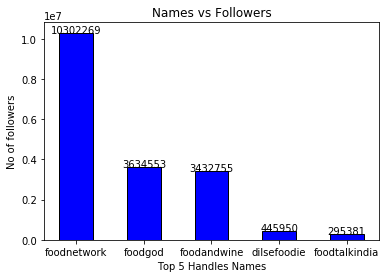

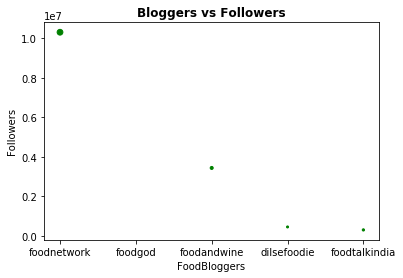

In [67]:
# 3)Depict this information using a suitable graph.:




# Firstly a bar graph is made for blogeers vs no of followers followed by a bubble graph


# top_5_handles = foodblogger handle name 
# post_count= no of post in prevoius 3 days 
# top_5_handles_followers=no of followers of these bloggers

# bar graph
import matplotlib.pyplot as plt # python library form plotting graphs
# plotting the bar graph
plt.bar(top_5_handles,top_5_handles_followers, color = 'b',edgecolor='black',width=0.5)
# providing the x-label
plt.xlabel('Top 5 Handles Names')
# y-label
plt.ylabel('No of followers')
# title of the graph
plt.title('Names vs Followers')
# priting the value on the top of the bars using enumerate()...enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
for index, value in enumerate(top_5_handles_followers):
    
    plt.text( index, value,str(value),ha='center')
# show the graph
plt.show()


# here another graph bubble graph is used in which name of foodblogger is on x-axis no of followers on y and size of bubble shows the 
# no of post in previous 3 days:
import matplotlib.pyplot as plt# python library form plotting graphs

plt.scatter(top_5_handles,top_5_handles_followers,color='green',s=post_count,label="Scale")
# x and y label for the graph
plt.xlabel('FoodBloggers')
plt.ylabel('Followers')

# title of the graph
plt.title('Bloggers vs Followers',fontweight="bold")

plt.show()

# here bubble will show the no of post in previous three days
# please note :- ***their is not any post for foodgod in previous 3 days so no bubble for foodgod***

# Ques 4: Your friend also needs a list of hashtags that he should use in his posts.

    1) Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.                                                                                                                 
    2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word.                                                           
    3) Create a csv file with two columns : the word and its frequency                                                           
    4) Now, find the hashtags that were most popular among these bloggers                                                           
    5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used by these bloggers in the scraped posts.
 

# 4.1) Code for scrape the content of top 10 post of the 5 handles

In [62]:
# code for 1)  Open the 5 handles you obtained in the last question, and scrape the content of the first 10 posts of each handle.

from selenium import webdriver #The selenium.webdriver module provides all the WebDriver implementationsm,This allow us to control browser with our code
from selenium.webdriver.support.ui import WebDriverWait# files for providing waits
from selenium.webdriver.support import expected_conditions as EC# to provide the explicit wait (conditon)
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains#ActionChains are a way to automate low level interactions such as mouse movements, mouse button actions, key press
from selenium.webdriver.common.keys import Keys# This Keys class provide keys in the keyboard
import time# Importing the time 
from selenium.common.exceptions import NoSuchElementException# import nosuchelementexception module
from datetime import datetime

def Content_post(handle_name):
    # h=gi to the instagram handle of the dilsefoodie using the handlename 
    wait = WebDriverWait(driver,10)
    i='https://www.instagram.com/'+ handle_name
    driver.get(i)
    # wait for some time to load the page
    time.sleep(3)
    # innitilize actionChain to automate low level interactions such as mouse movements, mouse button actions, key press,
    actionChain=webdriver.ActionChains(driver)#action chain object
    # scroll the page using the actionChain for uploading the posts 
    for i in range(100):
        actionChain.key_down(Keys.SPACE).key_up(Keys.SPACE).perform()# scrollung the page of dilsefoodie
    # take the control on the top of the page so that can start from 1st post
    driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + Keys.HOME)
    time.sleep(3)
    #made a list to store the href of every post the href are in a tag of div having class = "v1Nh3 kIKUG  _bz0w"
    href = []
    for i in driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a'):
        # appending the url of post in the list href
        href.append(i.get_attribute('href'))
        
    # make a list for appending the content
    content=[]
    
    for i in range(10):
        try: # in case their is content with post
            #itrate over the list one by one and take the info of liked or not of the post
            driver.get(href[i])
            # locate the content info of the top 10 post one by one and append it in the list
            content_info_ = driver.find_element_by_xpath('//div[@class="C7I1f X7jCj"]/div[2]/span').text

            content.append(content_info_)
        # if their is no content within the post
        except NoSuchElementException:
            pass
       
        
    
        
    # return the content list
    return content

def login(driver):
    
    # go to instagram login page using .get request
    driver.get('https://www.instagram.com/')
    # wait for some time for loading page
    time.sleep(2)
    # passing the username in the the text-box for username(This text-box has name->username so I'm using this to locate the text-box)
    username=driver.find_element_by_name('username').send_keys('sample_username')# pass the user handle name or email or mobile no(for that i used .send_keys)
    # passing the password in the the text-box for password(This text-box has name->password so I'm using this to locate the text-box)
    password=driver.find_element_by_name('password').send_keys('sample_password')# pass the password(for that i used .send_keys)
    # now need to click on login button to login and this is of type submit so used .submit to click over it
    Login_button=driver.find_element_by_class_name('sqdOP.L3NKy.y3zKF').submit()#class name for login button was  "sqdOP.L3NKy.y3zKF" so i used that
    # wait for some time to completely load the page here i used implicit wait I have given Implicit Wait as 5 seconds, #
    #which implies the maximum wait time is 5 seconds for the particular element to load or to arrive at the output
    # means agr phle output aagya tho wait nhi krega yeh
    
    driver.implicitly_wait(5)
    # as You login their comes a pop up saying whether you want to save the details or not Here we are 
    # handling this by clicking on not now button
    try:# if this pop up comes click on not now
        save_login_info=driver.find_element_by_xpath('//div[@class="cmbtv"]/button').click()
    except NoSuchElementException:# if no such pop-up open then pass (I'm doing this because some time this pop up doesnt came)
        pass
    # wait for some time to load the page
    driver.implicitly_wait(10)
    # ek notification aa rhi hai as you login :-"Turn on Notifications Know right away when people follow you or like and comment on your photos."
    # thi Extra_notification_handle is to handle that extra notification
    Extra_notification_handle=driver.find_element_by_class_name('aOOlW.HoLwm ')#aOOlW   HoLwm is the class name for cancle button of notification 
    Extra_notification_handle.click()# bacuse the cancle button is not of submit type so I had to click
    time.sleep(2)
            


# using geckodriver(FireFox web driver name) to remote the window please use the path for geckodriver as per your system
# here geckodriver is within anaconda so I write it straight forward
driver=webdriver.Firefox(executable_path='geckodriver')
# calling login function
login(driver)
# list of content of all the post of top 5 handles
post_content=[]
# running the loop for top 5 contents
for i in top_5_handles:
    a=(Content_post(i))
    print("content of blogger",i,"is:",a)
    print()
    
    
    
    
    #********************* append in the list for futher use******************
    post_content.append(a)

content of blogger foodnetwork is: ["Recipe of the Day: @giadadelaureniis' Berry Strata 🍓Save the recipe on your @foodnetworkkitchen app today! #WeCook", "Ravioli with Ricotta and Mushrooms (with @chefanneburrell)\n\nChef Anne whips up her famous homemade pasta dough for her Ravioli with Ricotta and Mushrooms!\n\nGet a sneak peek at Anne's Boot Camp demo before an all-new #WorstCooks Celebrity Edition > tonight at 9|8c.\n\nSave the recipe in your @FoodNetworkKitchen app!", "@BobbyFlay's 5🌟 Bacon Burgers\n\nThese juicy burgers are topped with a generous layer of rich, creamy pimiento cheese and plenty of crispy bacon 🤤\n\nCatch @bobbyflay on a new episode of #BeatBobbyFlay, tonight @ 10|9c!\n\nSave the recipe on the @FoodNetworkKitchen app.", "Class of the Day: Carrot Cake Scones with Cream Cheese Glaze 🥕 All the flavors of carrot cake inflused into a scone? Don't mind if we do! Pastry Chef @misschefsmileypants shows you make warm, buttery scones and a tangy cream cheese glaze in her cl

content of blogger foodtalkindia is: ['This punch packing, boozy bitter is a 3 ingredient cocktail like none other. Here are 3 interesting facts about a Negroni.\n.\n- It was created upon a request for an ‘Americano with a gin’ by Count Camillo Negroni (Italian nobleman) in 1919 in Florence\n- Has been voted as the second best cocktail four times in a row according to the Drinks International.\n- Negronis are always far better when stirred with the finger', 'Mangoes, Avocados, Pineapple, watermelon and many more.\n@bestfruitcompany have it all. A home grown brand that believes in handpicked fruit.\n\nNo need to worry about stepping out and exposing yourself to taste the goodness of best fruit 🥭🥑🍉🍍 .\n.\n\nFor contactless safe delivery whatsapp us on +919818817754', 'Tired of cooking at home? @unitedcoffeehouse has opened its kitchens and is now available through take-away or home deliveries.\nTaking all possible hygiene measures to give you the same experience you have savoured since d

# 4.2) Code for making a list of all the words and their frequency..

In [70]:
# code for 4 2) 2) Prepare a list of all words used in all the scraped posts and calculate the frequency of each word. 
import re #inbuilt python module for check if a string contains the specified search pattern.
# *** making  a list of all the words in scrape data of posts
all_word_list=[]
for i in post_content:
    # itrate over the words in the content
    for j in i:
        # splitting the words using regular expression on the base of spliters \n(end of line) and \s (space)
        all_word_list.append(re.split('\n|\s',j))
# printing the list
print(all_word_list)
# making the dict for count of the freq
dict={}
# itrate over the list of word if the word is already in dict inc the count else innitate the count with 1
for i in all_word_list:
    for j in i: # if present inc the count
        if j in dict:
            dict[j]+=1
        else:# else initate the count by 1
            dict[j]=1
# printing the dict having the word and their count
print()
print("The dict containing words and their freq:")
print()
print(dict)

[['Recipe', 'of', 'the', 'Day:', "@giadadelaureniis'", 'Berry', 'Strata', '🍓Save', 'the', 'recipe', 'on', 'your', '@foodnetworkkitchen', 'app', 'today!', '#WeCook'], ['Ravioli', 'with', 'Ricotta', 'and', 'Mushrooms', '(with', '@chefanneburrell)', '', 'Chef', 'Anne', 'whips', 'up', 'her', 'famous', 'homemade', 'pasta', 'dough', 'for', 'her', 'Ravioli', 'with', 'Ricotta', 'and', 'Mushrooms!', '', 'Get', 'a', 'sneak', 'peek', 'at', "Anne's", 'Boot', 'Camp', 'demo', 'before', 'an', 'all-new', '#WorstCooks', 'Celebrity', 'Edition', '>', 'tonight', 'at', '9|8c.', '', 'Save', 'the', 'recipe', 'in', 'your', '@FoodNetworkKitchen', 'app!'], ["@BobbyFlay's", '5🌟', 'Bacon', 'Burgers', '', 'These', 'juicy', 'burgers', 'are', 'topped', 'with', 'a', 'generous', 'layer', 'of', 'rich,', 'creamy', 'pimiento', 'cheese', 'and', 'plenty', 'of', 'crispy', 'bacon', '🤤', '', 'Catch', '@bobbyflay', 'on', 'a', 'new', 'episode', 'of', '#BeatBobbyFlay,', 'tonight', '@', '10|9c!', '', 'Save', 'the', 'recipe', 'on'

# 4.3) Code for making a csv file

In [64]:
#code for 4) 3) Create a csv file with two columns : the word and its frequency   
# made a list of words and their freq
a=[i for i in dict.keys()]
b=[i for i in dict.values()]
# making a dataframe using pandas havnig columns name words and freq
d={"Words":a,"Freq":b}
df=pd.DataFrame(d)
# made a csv file using the DF
df.to_csv('Hastags_Prolem.csv',index=False)# file saved in new folder (Jupyter wale)

# 4.4) code for find the top 5  hastages which were used most  

In [65]:
# code for 4) 4) Now, find the hashtags that were most popular among these bloggers
import pandas as pd #   python library for data processing, CSV file I/O
# reading the csv file having the words and freq
Hastages=pd.read_csv('Hastags_Prolem.csv')
df=Hastages
# extracting the words which start from '#' ( to pick the hastags) 
df=df[(df['Words'].str.get(0)=="#")]
# sorting the freq to pick the index of top 5 used hastags 
top_5=(df['Freq']).sort_values(ascending=False)[0:5]
# index of top 5 used hastags
top_5_index=(top_5.index)
# new df having these top 5 hastags only
new_df=df.loc[top_5_index]
new_df.reset_index(drop=True)
# printing the top 5 hastags and their freq
print(new_df.to_string(index=False,))


        Words  Freq
 #dilsefoodie    10
       #FWBNC     4
        #food     3
      #WeCook     3
      #odisha     2


# 4.5) Code for  Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used 


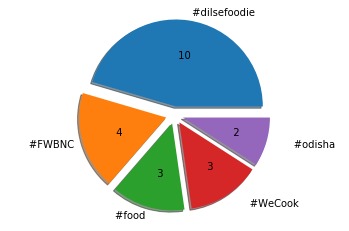

In [66]:
# Code for 4) 5) Plot a Pie Chart of the top 5 hashtags obtained and the number of times they were used 
# by these bloggers in the scraped posts.
import matplotlib.pyplot as plt# python library form plotting graphs
# making  a list of top 5 handles and their freq
Words=(new_df.Words.to_string(index=False)).split('\n')
Freq=(new_df.Freq.to_string(index=False)).split('\n')
# lets plot the pie chart
# to explode the chart
e=[0.1 for i in range(5)]
# equal the axis if pie chart
plt.axis('equal')
# plotting the pie chart having the percentage of cuisines served
p, tx, autotexts=plt.pie(Freq,labels=Words,explode=e,autopct='%.2f%%',shadow=True)
# printing the freq in the section of the respective hastag
for i, a in enumerate(autotexts):
    a.set_text("{}".format(Freq[i]))
plt.show()# show the pie chart

# Ques 6) You need to also calculate average followers : likes ratio for the obtained handles.
Followers : Likes ratio is calculated as follows:                                                                          
                                                                                                                                                    
    1) Find out the likes of the top 10 posts of the 5 handles obtained earlier.                                                                          
    2) Calculate the average likes for a handle.                                                                          
    3) Divide the average likes obtained from the number of followers of the handle to get the average followers:like ratio of each handle.                                                                            
    4)Create a bar graph to depict the above obtained information.


#  6.1) Code for Find out the likes of the top 10 posts of the 5 handles obtained earlier. 

In [22]:
# code for 6 1) Find out the likes of the top 10 posts of the 5 handles obtained earlier. 

# take the top_5_handles from 1 1)

top_5_handles=['foodnetwork', 'foodgod', 'foodandwine', 'dilsefoodie', 'foodtalkindia']



from selenium import webdriver #The selenium.webdriver module provides all the WebDriver implementationsm,This allow us to control browser with our code
from selenium.webdriver.support.ui import WebDriverWait# files for providing waits
from selenium.webdriver.support import expected_conditions as EC# to provide the explicit wait (conditon)
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains#ActionChains are a way to automate low level interactions such as mouse movements, mouse button actions, key press
from selenium.webdriver.common.keys import Keys# This Keys class provide keys in the keyboard
import time# Importing the time 
from selenium.common.exceptions import NoSuchElementException# import nosuchelementexception module
from datetime import datetime
from selenium import webdriver #The selenium.webdriver module provides all the WebDriver implementationsm,This allow us to control browser with our code
from selenium.webdriver.support.ui import WebDriverWait# files for providing waits
from selenium.webdriver.support import expected_conditions as EC# to provide the explicit wait (conditon)
from selenium.webdriver.common.by import By
from selenium.webdriver.common.action_chains import ActionChains#ActionChains are a way to automate low level interactions such as mouse movements, mouse button actions, key press
from selenium.webdriver.common.keys import Keys# This Keys class provide keys in the keyboard
import time# Importing the time 
from selenium.common.exceptions import NoSuchElementException# import nosuchelementexception module
from datetime import datetime

def Like_on_10_post(handle_name):
    #get the instagram handle of the dilsefoodie using the handlename 
    wait = WebDriverWait(driver,10)
    i='https://www.instagram.com/'+ handle_name
    driver.get(i)
    # wait for some time to load the page
    time.sleep(3)
    # initilize actionChain to automate low level interactions such as mouse movements, mouse button actions, key press,
    actionChain=webdriver.ActionChains(driver)#action chain object
    # scroll the page using the actionChain for uploading the posts 
    for i in range(100):
        actionChain.key_down(Keys.SPACE).key_up(Keys.SPACE).perform()# scrollung the page of dilsefoodie
   # going on the top of the page to start from the first post
    driver.find_element_by_tag_name('body').send_keys(Keys.CONTROL + Keys.HOME)
    time.sleep(3)
     #made a list to store the href of every post the href are in a tag of div having class = "v1Nh3 kIKUG  _bz0w"
    href = []
    for i in driver.find_elements_by_xpath('//div[@class="v1Nh3 kIKUG  _bz0w"]/a'):
        # appending the url of post in the list href
        href.append(i.get_attribute('href'))
        
    # a list to append the no of like on the top ten posts
    Likes=[]
    # itrate on the top 10 posts
    for i in range(10):
        
        #itrate over the list one by one and take the info of liked or not of the post
        driver.get(href[i])
        # locate the like information
        try:
            # getting the like info 
            # ** here in some post their is no of likes shown while on some their is no of viwes 
            # in case if their is no of views then click on that and a pop of no of like will be visible This is handles 
            # in try section while if no of likes visible directly is handled in except section
            Like_info_ = driver.find_element_by_xpath('//section[@class="EDfFK ygqzn"]/div/span').click()
            Like_info=driver.find_element_by_css_selector('div.vJRqr span').text
            # convert the string value of likes in integer
            Likes.append(int(Like_info.replace(',','')))
        except NoSuchElementException:
            Like_info_=driver.find_element_by_xpath('//section[@class="EDfFK ygqzn"]/div/div/button/span').text
            # convert the string value of likes in integer
            Likes.append(int(Like_info_.replace(',','')))
        
      
     # returning the likes       
    return Likes

def login(driver):
    
    # go to instagram login page using .get request
    driver.get('https://www.instagram.com/')
    # wait for some time for loading page
    time.sleep(2)
    # passing the username in the the text-box for username(This text-box has name->username so I'm using this to locate the text-box)
    username=driver.find_element_by_name('username').send_keys('sample_username')# pass the user handle name or email or mobile no(for that i used .send_keys)
    # passing the password in the the text-box for password(This text-box has name->password so I'm using this to locate the text-box)
    password=driver.find_element_by_name('password').send_keys('sample_password')# pass the password(for that i used .send_keys)
    # now need to click on login button to login and this is of type submit so used .submit to click over it
    Login_button=driver.find_element_by_class_name('sqdOP.L3NKy.y3zKF').submit()#class name for login button was  "sqdOP.L3NKy.y3zKF" so i used that
    # wait for some time to completely load the page here i used implicit wait I have given Implicit Wait as 5 seconds, #
    #which implies the maximum wait time is 5 seconds for the particular element to load or to arrive at the output
    # means agr phle output aagya tho wait nhi krega yeh
    
    driver.implicitly_wait(5)
    # as You login their comes a pop up saying whether you want to save the details or not Here we are 
    # handling this by clicking on not now button
    try:# if this pop up comes click on not now
        save_login_info=driver.find_element_by_xpath('//div[@class="cmbtv"]/button').click()
    except NoSuchElementException:# if no such pop-up open then pass (I'm doing this because some time this pop up doesnt came)
        pass
    # wait for some time to load the page 
    driver.implicitly_wait(10)
    # ek notification aa rhi hai as you login :-"Turn on Notifications Know right away when people follow you or like and comment on your photos."
    # thi Extra_notification_handle is to handle that extra notification
    Extra_notification_handle=driver.find_element_by_class_name('aOOlW.HoLwm ')#aOOlW   HoLwm is the class name for cancle button of notification 
    Extra_notification_handle.click()# bacuse the cancle button is not of submit type so I had to click
    time.sleep(2)
            


# using geckodriver(FireFox web driver name) to remote the window please use the path for geckodriver as per your system
# here geckodriver is within anaconda so I write it straight forward
driver=webdriver.Firefox(executable_path='geckodriver')
# calling login function
login(driver)
# making a list of likes on the top  post on every handle
post_Likes=[]
for i in top_5_handles:
    a=(Like_on_10_post(i))
    # printing the no of likes on top  posts
    print("No of likes on top 10 posts(resp) of blogger",i,"is:",a)
    print()
    
    
    # list of likes on top  post on every handle
    post_Likes.append(a)

No of likes on top 10 posts(resp) of blogger foodnetwork is: [6921, 8706, 7364, 6961, 4541, 7458, 11797, 9355, 10787, 10880]

No of likes on top 10 posts(resp) of blogger foodgod is: [31371, 6132, 30671, 13603, 59733, 30018, 21782, 78724, 24819, 26921]

No of likes on top 10 posts(resp) of blogger foodandwine is: [7046, 4750, 6178, 7874, 13996, 18707, 21812, 11252, 10363, 9133]

No of likes on top 10 posts(resp) of blogger dilsefoodie is: [6245, 7916, 5673, 11659, 6803, 9146, 7290, 7580, 3646, 14756]

No of likes on top 10 posts(resp) of blogger foodtalkindia is: [487, 991, 494, 577, 675, 129, 1646, 237, 181, 448]



# 6) Code for Calculate the average likes for a handle

In [71]:
# code for 6 2) Calculate the average likes for a handle.  
# a list of average likes:
average_likes_list=[] 
total_likes=0

for i in range(5):
    # itrate on no of likes on top  post of an insta handle and find their total likes
    for j in post_Likes[i]:
        total_likes+=j
    # average likes is total likes/10
    average_likes=total_likes/10
    average_likes_list.append(average_likes)
    #  printing the aveerage likes
    print("Average Likes for handle",top_5_handles[i],"is:",average_likes)

Average Likes for handle foodnetwork is: 8477.0
Average Likes for handle foodgod is: 40854.4
Average Likes for handle foodandwine is: 51965.5
Average Likes for handle dilsefoodie is: 60036.9
Average Likes for handle foodtalkindia is: 60623.4


# 6.3) Code for ratio of average followers: likes

In [57]:
# code for 6 3) Divide the average likes obtained from the number of followers of the handle to get
# the average followers:like ratio of each handle.

# the List for avergae like of top 5 handles -->average_likes_list
# the List for no of followers of top 5 handles    --> top_5_handles_followers
# no of followers for top 5 handles taken from probem 1
top_5_handles_followers=[10302269, 3634553, 3432755, 445950, 295381]

# made a list of the ratio of avg followers vs likes
ratio=[]
# cal the ratio 
for i,j in zip(average_likes_list,top_5_handles_followers):
    ratio.append(j/i)
    #printing the ratio
for i in range(5):
    print("The ratio of Average Followers : Likes for handle",top_5_handles[i],"is:",ratio[i])

The ratio of Average Followers : Likes for handle foodnetwork is: 1215.320160434116
The ratio of Average Followers : Likes for handle foodgod is: 88.96356328816479
The ratio of Average Followers : Likes for handle foodandwine is: 66.05834640290192
The ratio of Average Followers : Likes for handle dilsefoodie is: 7.427931821929513
The ratio of Average Followers : Likes for handle foodtalkindia is: 4.872392508503317


# 6.4)  Code for Create a bar graph to depict the above obtained information.


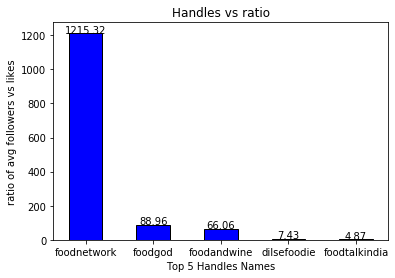

In [58]:
# code for 6 4) Create a bar graph to depict the above obtained information.

import matplotlib.pyplot as plt # python library form plotting graphs
# plotting the bar graph
plt.bar(top_5_handles,ratio, color = 'b',edgecolor='black',width=0.5)
# providing the x-label
plt.xlabel('Top 5 Handles Names')
# y-label
plt.ylabel('ratio of avg followers vs likes')
# title of the graph
plt.title('Handles vs ratio')
# priting the value on the top of the bars using enumerate()...enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. 
for index, value in enumerate(ratio):
    
    plt.text( index, value,"{:.2f}".format(value),ha='center')
# show the graph
plt.show()
